Flight Price

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [4]:
# Loading flight price dataset
import pandas as pd
df_flight = pd.read_excel('./datasets/flight_price.xlsx')
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Number of rows and columns in dataframe
num_rows, num_cols = df_flight.shape
print(f'Number of rows in flight dataset is : {num_rows}')
print(f'Number of columns in flight dataset is : {num_cols}')

Number of rows in flight dataset is : 10683
Number of columns in flight dataset is : 11


Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

In [6]:
## function to plot QQ plots along with Histograms to check normality
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
def qq_plot(df, feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.title(f'Histogram Plot for : {feature}')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for : {feature}')
    plt.show()

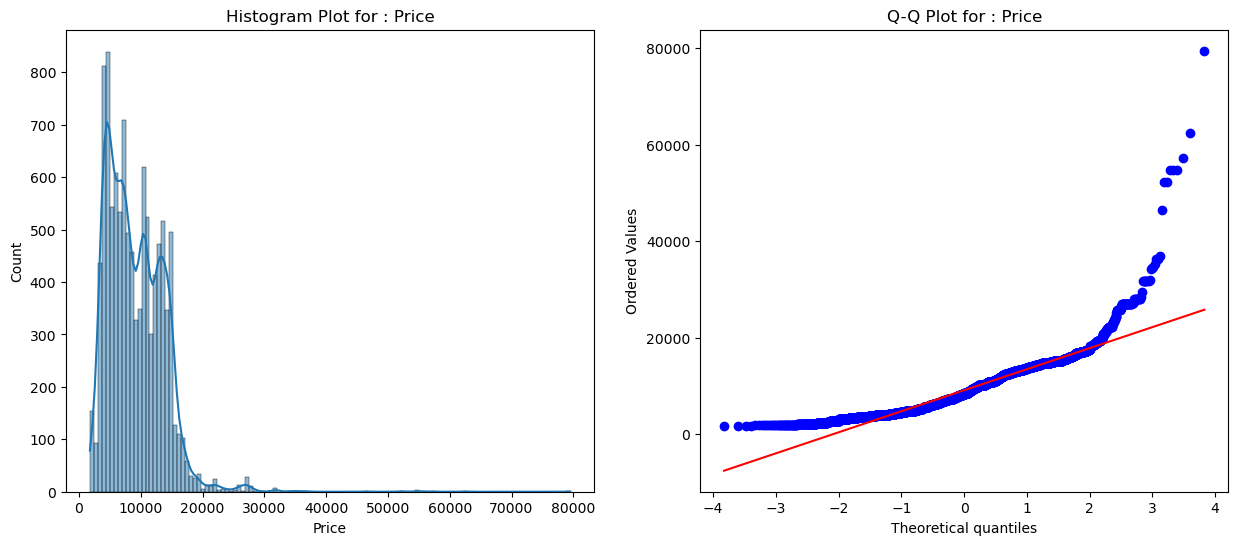

In [7]:
qq_plot(df_flight,'Price')

Histogram shows that Price is Right (Positively) Skewed


Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [8]:
# Calculate max , min and range of price in dataset
max_price = df_flight['Price'].max()
min_price = df_flight['Price'].min()
range_price = max_price - min_price

# Print Max , Min and Range values
print(f'Maximum Price of Flight is : {max_price}')
print(f'Minimum Price of Flight is : {min_price}')
print(f'Range of price is : {range_price}')

Maximum Price of Flight is : 79512
Minimum Price of Flight is : 1759
Range of price is : 77753


In [9]:
df_flight[['Price']].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.


In [10]:
df_flight.groupby(by='Airline').describe()

Price                              \
                                    count          mean           std   
Airline                                                                 
Air Asia                            319.0   5590.260188   2027.362290   
Air India                          1752.0   9611.210616   3900.952942   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2053.0   5673.682903   2264.142168   
Jet Airways                        3849.0  11643.923357   4258.940578   
Jet Airways Business                  6.0  58358.666667  11667.596748   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
SpiceJet                            818.0   4338.284841   1849.922514   
Trujet                                1.0   4140.000000           NaN   
Vistara                             479.0   7796.348643   2914.298578   
Vistara Premium economy               3.0   8962.333333   2915.405518   

                                                                        \
                                       min      25%      50%       75%   
Airline                                                                  
Air Asia                            3383.0   4282.0   5162.0   6451.00   
Air India                           2050.0   6896.0   9443.0  12219.00   
GoAir                               3398.0   3898.0   5135.0   6811.25   
IndiGo                              2227.0   4226.0   5000.0   6494.00   
Jet Airways                         1840.0   9134.0  11467.0  14151.00   
Jet Airways Business               46490.0  52243.0  54747.0  61122.50   
Multiple carriers                   5797.0   7723.0  10197.0  13587.00   
Multiple carriers Premium economy   9845.0  10161.0  11269.0  11269.00   
SpiceJet                            1759.0   3574.5   3873.0   4760.00   
Trujet                              4140.0   4140.0   4140.0   4140.00   
Vistara                             3687.0   5403.0   7980.0   9345.00   
Vistara Premium economy             5969.0   7547.0   9125.0  10459.00   

                                            
                                       max  
Airline                                     
Air Asia                           13774.0  
Air India                          31945.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Jet Airways                        54826.0  
Jet Airways Business               79512.0  
Multiple carriers                  36983.0  
Multiple carriers Premium economy  14629.0  
SpiceJet                           23267.0  
Trujet                              4140.0  
Vistara                            21730.0  
Vistara Premium economy            11793.0

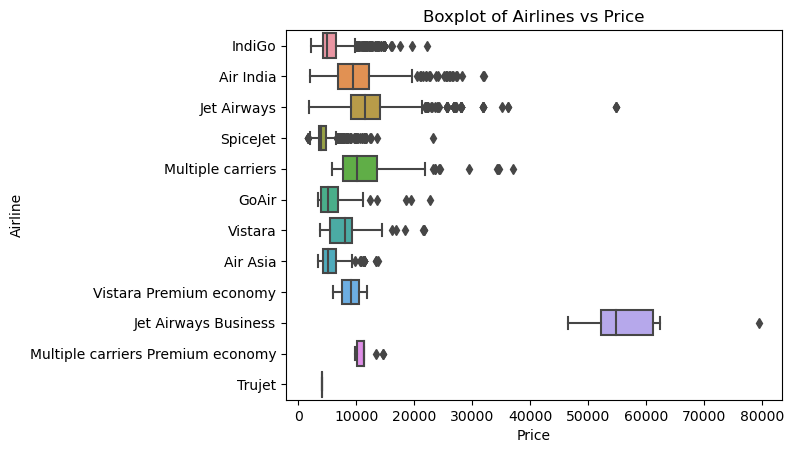

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
sns.boxplot(data=df_flight, x='Price', y='Airline')
plt.title('Boxplot of Airlines vs Price')
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

A boxplot is a visual representation that summarizes the distribution of a dataset based on five summary statistics: minimum value, first quartile, median, third quartile, and maximum value. The plot also identifies potential outliers, which are data points that lie beyond the whiskers of the boxplot and are defined as values that are more than 1.5 times the interquartile range away from the first or third quartiles.

When analyzing a dataset, it is important to consider any potential outliers and determine their relevance to the research question. If an outlier is a valid data point, it may represent a rare event or a significant variation from the typical values in the dataset. In this case, investigating the outlier further may be valuable, and deciding whether to include or exclude it from the analysis is necessary.

Conversely, if an outlier is an error or an invalid data point, it should be removed from the dataset to prevent skewing the results. It is important to identify the cause of the outlier and take steps to avoid similar errors in the future.

In conclusion, identifying and interpreting potential outliers using a boxplot is a crucial step in data analysis, as outliers can greatly affect the results. Examining each outlier individually and determining its validity and relevance to the research question is essential.

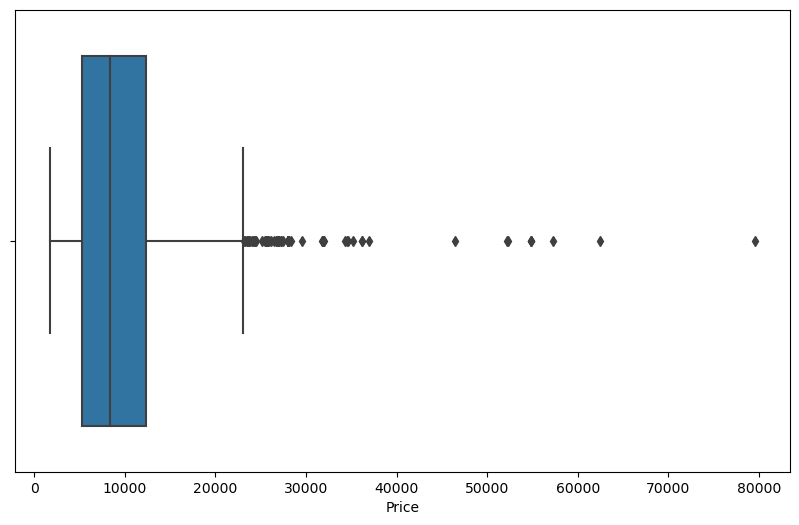

In [12]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df_flight,x='Price')
plt.show()

# Outliers found in the Price of flight

In [13]:
import numpy as np
from scipy.stats import iqr

# Calculate the IQR
q1, q3 = np.percentile(df_flight['Price'], [25, 75])
iqr_value = iqr(df_flight['Price'])

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr_value)
print("Lower Box :",q1-1.5*iqr_value)
print("Upper Box :",q3 + 1.5*iqr_value)
print("Max Price :",df_flight['Price'].max())
print("Min Price :",df_flight['Price'].min())

Q1: 5277.0
Q3: 12373.0
IQR: 7096.0
Lower Box : -5367.0
Upper Box : 23017.0
Max Price : 79512
Min Price : 1759


Outliers found on positive side

In [13]:
df_flight[df_flight.Price > q3 + 1.5*iqr_value]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


# 94 Outliers found

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?


To determine the peak travel season from the Flight Price dataset, there are various features that could be examined. Some potential features include the month of the year, day of the week, destination, and departure city. Analyzing the average flight prices for each of these features can reveal any seasonal patterns in travel demand and help to identify the timeframes with the highest and lowest flight prices.

For instance, examining the average flight prices for each month can help determine the months with the highest and lowest prices, while analyzing the average flight prices for each day of the week can reveal patterns in travel demand based on the day of the week. Similarly, analyzing the average flight prices for each destination or departure city can highlight seasonal patterns in travel demand for specific locations.

To present the findings to the boss, it is essential to communicate the key insights in a clear and concise manner. One way to achieve this is by creating visualizations such as line graphs or bar charts, displaying the average flight prices for each of the analyzed features. These visualizations can be supported by a summary of the most important findings and takeaways from the analysis.

In [14]:
from warnings import filterwarnings
filterwarnings('ignore')
df_flight['Date_of_Journey']=pd.to_datetime(df_flight['Date_of_Journey'])

In [15]:
df_flight['Date'] = df_flight['Date_of_Journey'].dt.day
df_flight['Month'] = df_flight['Date_of_Journey'].dt.month
df_flight['Year'] = df_flight['Date_of_Journey'].dt.year
df_flight['Day'] = df_flight['Date_of_Journey'].dt.day_name()


In [16]:
df_flight.groupby(by='Month').mean()['Price'].sort_values()

Month
4      5230.860849
3      8433.839891
12     9110.774295
6      9214.964905
5      9361.077628
9      9551.474395
1     10492.642791
Name: Price, dtype: float64

<AxesSubplot:xlabel='Month'>

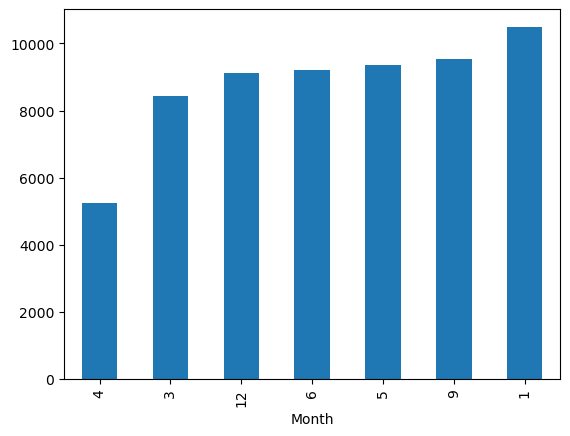

In [17]:
df_flight.groupby(by='Month').mean()['Price'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Month'>

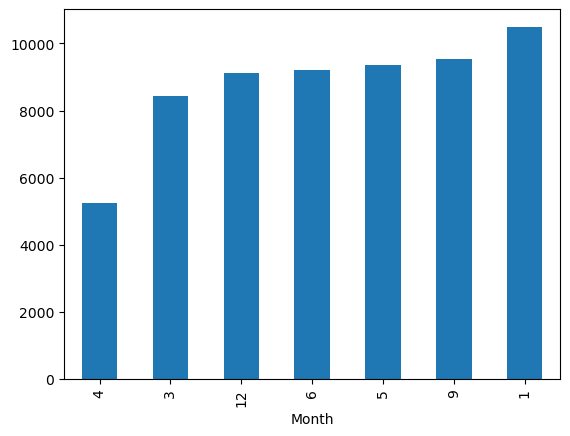

In [18]:
df_flight.groupby(by='Month').mean()['Price'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Day'>

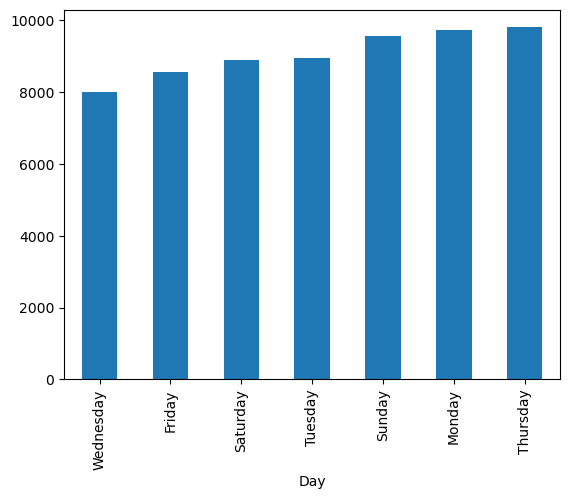

In [19]:
df_flight.groupby(by='Day').mean()['Price'].sort_values().plot(kind='bar')

In [20]:
df_flight.groupby(by='Destination').mean()['Price'].sort_values()

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         5143.918577
Banglore      9158.389411
Cochin       10539.439057
New Delhi    11917.716738
Name: Price, dtype: float64

<AxesSubplot:xlabel='Destination'>

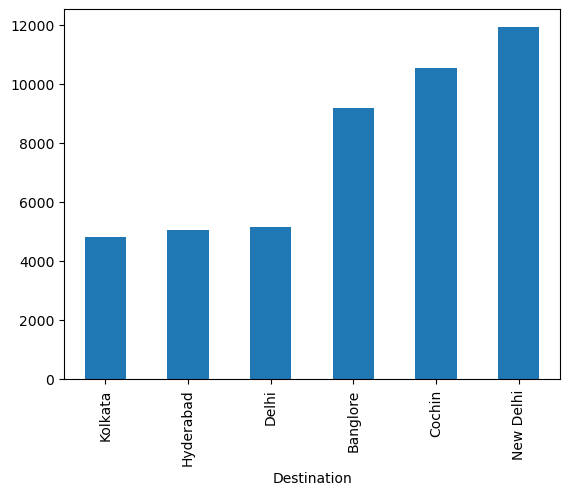

In [21]:
df_flight.groupby(by='Destination').mean()['Price'].sort_values().plot(kind='bar')

In [22]:
df_flight.groupby(by='Source').mean()['Price'].sort_values()

Source
Chennai      4789.892388
Mumbai       5059.708752
Banglore     8017.464269
Kolkata      9158.389411
Delhi       10539.439057
Name: Price, dtype: float64

<AxesSubplot:xlabel='Source'>

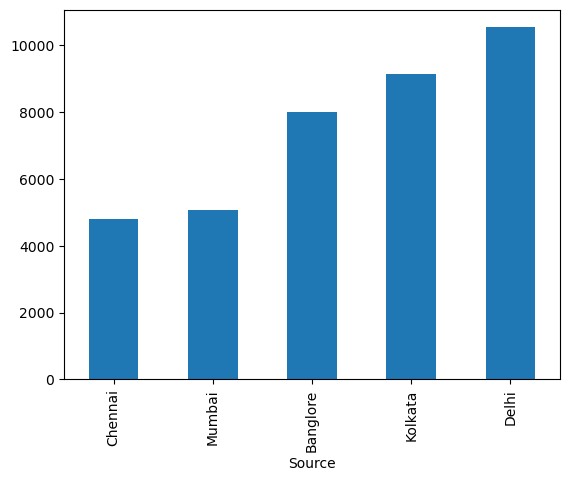

In [23]:
df_flight.groupby(by='Source').mean()['Price'].sort_values().plot(kind='bar')

Insights :
Cheapest Price is in Month of April with average price of 5230.86
Cheapest Prices are usually with flights departing on Wednesday at average price of 7996.29
Cheapest Flight destination is Kolkata with average price of 4789.89
Cheapest Flights are starting from city Chennai with average price of 4789.89

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?


To identify trends in flight prices from the Flight Price dataset, I would first analyze the time-related, route-related, airline-related, and demand-related features. These features can reveal whether flight prices tend to be higher or lower during specific times of the year, on certain routes, with specific airlines, or when demand is high or low.

To present my findings, I would use various visualizations, such as line charts to display changes in flight prices over time or by the time of day and day of the week. Scatterplots could be used to show the relationship between flight prices and variables like the number of passengers or seats available. Bar charts could compare flight prices across airlines or routes, while heatmaps could show which periods have higher or lower flight prices on different routes.

By analyzing these features and using visualizations, I could identify patterns or trends in flight prices to help the flight booking website optimize pricing strategies and better serve their customers.

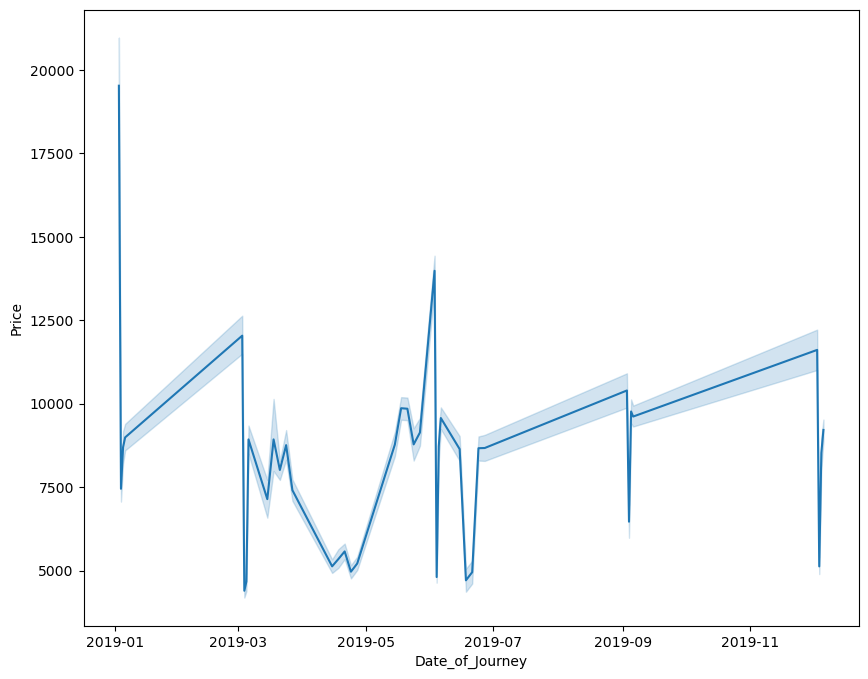

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(data=df_flight, x='Date_of_Journey',y='Price')
plt.show()

In [25]:
df_flight.groupby(by='Airline').mean()['Price'].sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

<AxesSubplot:xlabel='Airline'>

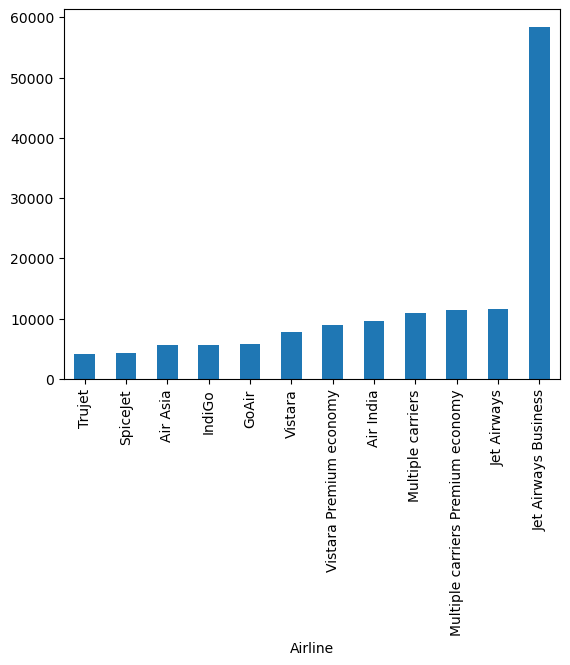

In [26]:
df_flight.groupby(by='Airline').mean()['Price'].sort_values().plot(kind='bar')

<AxesSubplot:>

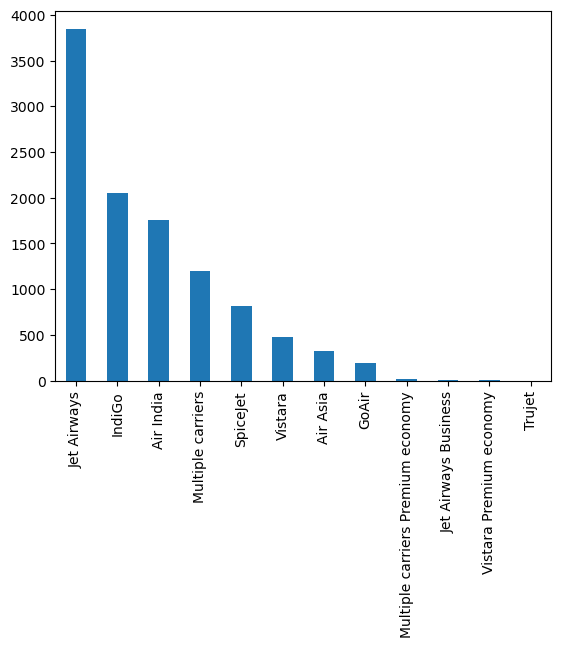

In [27]:
#Insights : Truejet Flights are cheapest
df_flight['Airline'].value_counts().plot(kind='bar')

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

To determine the factors influencing flight prices, I would commence by analyzing several features in the Flight Price dataset, including time-related features such as booking date, travel date, and time of day. This analysis would enable me to establish whether flight prices are typically higher or lower during specific periods of the year or times of the day. Additionally, I would evaluate route-related features such as the origin and destination cities of the flights, along with any stopovers or layovers, to determine whether prices vary according to particular routes or specific stopover locations. I would also assess airline-related features, such as the airline carrier for each flight, to determine whether certain airlines typically have higher or lower prices than others. Other factors that may impact flight prices could include the type of aircraft used, the length of the flight, or the class of service.

To present my findings to the management team, I would generate a report that includes a range of visualizations to help illustrate the relationships between various features and flight prices. For instance, I might create scatterplots to show the correlation between flight prices and the number of passengers or the number of seats available. I might also produce bar charts to compare flight prices across different airlines or routes. Additionally, I would provide summary statistics for each feature, including measures of central tendency, variance, and any outliers, which would give the management team a general overview of each feature's distribution.

I would also conduct a regression analysis to determine which factors have the greatest impact on flight prices. This analysis would enable me to develop a predictive model that could be used to estimate flight prices based on different combinations of features.

Based on my analysis, I would draw conclusions regarding the factors that have the most significant influence on flight prices and make recommendations to the management team on how they could adjust their pricing strategies to meet the needs of their customers better. Ultimately, my aim would be to assist the airline company in making data-driven decisions that would improve their profitability and enhance their customers' satisfaction.


In [28]:
df_flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,Saturday


In [29]:
#Data Cleaning and Feature Engineering
df_flight.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Day                0
dtype: int64

In [30]:
df_flight['Day_no'] = df_flight['Date_of_Journey'].dt.dayofweek
df_flight = df_flight.drop(labels=['Date_of_Journey','Day'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5


In [31]:
# Arrival Feature Engineering
df_flight['Arrival_Time'] = df_flight['Arrival_Time'].apply(lambda s:s.split(' ')[0])
df_flight['Arrival_hour'] = df_flight['Arrival_Time'].str.split(':').str[0]
df_flight['Arrival_min'] = df_flight['Arrival_Time'].str.split(':').str[1]
df_flight['Arrival_hour'] = df_flight['Arrival_hour'].astype(int)
df_flight['Arrival_min'] = df_flight['Arrival_min'].astype(int)
df_flight = df_flight.drop(labels=['Arrival_Time'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,6,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,5,1,2019,5,13,15


In [32]:
# Departure Feature Engineering
df_flight['Dep_hour'] = df_flight['Dep_Time'].str.split(':').str[0]
df_flight['Dep_min'] = df_flight['Dep_Time'].str.split(':').str[1]
df_flight['Dep_hour'] = df_flight['Dep_hour'].astype(int)
df_flight['Dep_min'] = df_flight['Dep_min'].astype(int)
df_flight = df_flight.drop(labels=['Dep_Time'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,6,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,13,15,5,50


In [33]:
# Creating Function to get the duration of flight from string 
def get_duration_float(s):
    if ((s.find('h')>0) and (s.find('m')>0)):
        hrs = s.split('h')[0]
        mins = s.split(' ')[1][:-1]
    elif((s.find('h')>0) and (s.find('m')<0)):
        hrs = s.split('h')[0]
        mins = 0
    elif((s.find('h')<0) and (s.find('m')>0)):
        hrs = 0
        mins = s.split('m')[0]
    duration = float(hrs) + float(mins)/60
    return duration
df_flight['dur_float'] = df_flight['Duration'].apply(get_duration_float)
df_flight = df_flight.drop(labels=['Duration'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,13,15,5,50,7.416667


In [34]:
# Total Stops
df_flight[df_flight['Total_Stops'].isna()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,5,6,2019,2,9,25,9,45,23.666667


In [35]:
md = df_flight['Total_Stops'].mode()[0]
md

'1 stop'

In [36]:
df_flight['Total_Stops'] = df_flight['Total_Stops'].fillna(md)
df_flight['Total_Stops'].isna().sum()

0

In [37]:
stops_mapper = {
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
}
df_flight['Total_Stops'] = df_flight['Total_Stops'].map(stops_mapper)
df_flight.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,2019,5,13,15,5,50,7.416667


In [38]:
# Drop route and additional info
df_flight = df_flight.drop(labels=['Route','Additional_Info'],axis=1)
df_flight.head(2)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,5,13,15,5,50,7.416667


In [39]:
df_flight.duplicated().sum()

222

In [40]:
df_flight = df_flight.drop_duplicates(keep='first')


In [41]:
# Save Clean File as csv
df_flight.to_csv('./datasets/flight_cleaned.csv')
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       10461 non-null  object 
 1   Source        10461 non-null  object 
 2   Destination   10461 non-null  object 
 3   Total_Stops   10461 non-null  int64  
 4   Price         10461 non-null  int64  
 5   Date          10461 non-null  int64  
 6   Month         10461 non-null  int64  
 7   Year          10461 non-null  int64  
 8   Day_no        10461 non-null  int64  
 9   Arrival_hour  10461 non-null  int32  
 10  Arrival_min   10461 non-null  int32  
 11  Dep_hour      10461 non-null  int32  
 12  Dep_min       10461 non-null  int32  
 13  dur_float     10461 non-null  float64
dtypes: float64(1), int32(4), int64(6), object(3)
memory usage: 1.0+ MB


Feature Engineering

In [42]:
# Seperating X and Y
X = df_flight.drop(labels=['Price'],axis=1)
Y = df_flight[['Price']]
# Seperating Numeric and Categorical Features
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
print(f'Numerical Features : {num_cols}')
print(f'Categorical Features : {cat_cols}')

Numerical Features : ['Total_Stops', 'Date', 'Month', 'Year', 'Day_no', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min', 'dur_float']
Categorical Features : ['Airline', 'Source', 'Destination']


In [43]:
# One Hot Encoding of Categorical Variables
X_cat = pd.get_dummies(X[cat_cols])
X_cat.head()


,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Concatenating Num and Cat variables
X_concat = pd.concat([X[num_cols],X_cat],axis=1)
X_concat.head()

,Total_Stops,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,6,1,10,22,20,2.833333,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,2019,5,13,15,5,50,7.416667,...,0,0,1,0,1,0,0,0,0,0
2,2,6,9,2019,4,4,25,9,25,19.000000,...,0,1,0,0,0,1,0,0,0,0
3,1,5,12,2019,3,23,30,18,5,5.416667,...,0,0,1,0,1,0,0,0,0,0
4,1,3,1,2019,3,21,35,16,50,4.750000,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# Train Test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_concat,Y,test_size=0.2,random_state=23)
# Apply Standard Scaling on X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)
xtrain.head()

,Total_Stops,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.292796,-1.096253,0.159183,0.0,-1.579155,1.103054,-1.489652,-0.951406,0.294934,0.356395,...,-0.195812,1.170987,-0.606254,-0.268832,-0.606254,1.170987,-0.367148,-0.268832,-0.195812,-0.307525
1,-1.220558,-0.754542,0.159183,0.0,0.057299,0.375842,1.840188,0.266141,0.029528,-0.962973,...,-0.195812,-0.853981,1.649474,-0.268832,1.649474,-0.853981,-0.367148,-0.268832,-0.195812,-0.307525
2,1.806151,1.637430,0.159183,0.0,0.057299,-1.369467,0.023912,1.309752,-1.297502,-0.253313,...,-0.195812,1.170987,-0.606254,-0.268832,-0.606254,1.170987,-0.367148,-0.268832,-0.195812,-0.307525
3,0.292796,0.270589,-0.174662,0.0,-0.488185,0.666727,0.326624,-0.603535,0.029528,-0.173351,...,-0.195812,-0.853981,1.649474,-0.268832,1.649474,-0.853981,-0.367148,-0.268832,-0.195812,-0.307525
4,0.292796,-0.868446,1.160716,0.0,0.057299,0.666727,-1.489652,0.787947,-1.297502,1.735733,...,-0.195812,-0.853981,1.649474,-0.268832,1.649474,-0.853981,-0.367148,-0.268832,-0.195812,-0.307525


In [46]:
xtest.head()

,Total_Stops,Date,Month,Year,Day_no,Arrival_hour,Arrival_min,Dep_hour,Dep_min,dur_float,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220558,-0.868446,-1.510040,0.0,1.148269,-1.078582,1.537476,-1.473211,-1.297502,-0.922992,...,-0.195812,-0.853981,-0.606254,-0.268832,-0.606254,-0.853981,2.723694,-0.268832,-0.195812,-0.307525
1,3.319505,-1.096253,-1.510040,0.0,0.057299,-0.205928,-0.581514,-1.299276,1.356559,2.385422,...,-0.195812,-0.853981,-0.606254,-0.268832,-0.606254,-0.853981,-0.367148,-0.268832,-0.195812,3.251768
2,-1.220558,1.295720,-0.508507,0.0,-0.488185,0.812169,1.234763,0.787947,-1.297502,-0.932987,...,-0.195812,-0.853981,-0.606254,-0.268832,-0.606254,-0.853981,2.723694,-0.268832,-0.195812,-0.307525
3,0.292796,-1.096253,0.159183,0.0,-1.579155,0.666727,1.537476,0.092206,-1.297502,-0.563165,...,-0.195812,1.170987,-0.606254,-0.268832,-0.606254,1.170987,-0.367148,-0.268832,-0.195812,-0.307525
4,0.292796,-0.754542,2.162250,0.0,0.602784,0.812169,-0.581514,-0.777471,0.294934,0.026553,...,-0.195812,1.170987,-0.606254,-0.268832,-0.606254,1.170987,-0.367148,-0.268832,-0.195812,-0.307525


In [47]:
# Catboost Regressor 
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE',iterations=1000)
model.fit(xtrain,ytrain, verbose=False)

In [48]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Catboost Regressor 
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE',iterations=1000)
model.fit(xtrain,ytrain, verbose=False)

In [50]:
# Predicting Values
ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

In [51]:
# Function to evaluate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    rmse = mse**0.5
    r2 = r2_score(actual,predicted)
    return mae, rmse, r2

In [52]:
#unction to print model metrics
def print_eval_results(ytrain,ytrain_pred,ytest,ytest_pred):
     # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)

    # Printing results
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

In [53]:
print_eval_results(ytrain, ytrain_pred, ytest, ytest_pred)

Model performance for Training set
- Root Mean Squared Error: 1359.9588
- Mean Absolute Error: 972.5161
- R2 Score: 0.9151
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1739.9255
- Mean Absolute Error: 1175.8813
- R2 Score: 0.8469


In [62]:
# Model Importance
imp = pd.Series(model.feature_importances_)
imp.index = model.feature_names_
imp = imp.sort_values(ascending=False)
imp

dur_float                                    22.651306
Date                                         18.941952
Total_Stops                                  10.407652
Airline_Jet Airways                           9.561925
Month                                         6.674627
Arrival_hour                                  4.306702
Airline_Jet Airways Business                  3.333971
Dep_min                                       3.149646
Day_no                                        3.071925
Airline_IndiGo                                2.850787
Dep_hour                                      2.826073
Arrival_min                                   2.583291
Airline_Multiple carriers                     2.107546
Destination_New Delhi                         2.055612
Source_Mumbai                                 0.728581
Airline_SpiceJet                              0.711499
Destination_Cochin                            0.564931
Airline_GoAir                                 0.513070
Airline_Vi

In [55]:
# Model Importance
imp = pd.Series(model.feature_importances_)
imp.index = model.feature_names_
imp = imp.sort_values(ascending=False)
imp

dur_float                                    22.651306
Date                                         18.941952
Total_Stops                                  10.407652
Airline_Jet Airways                           9.561925
Month                                         6.674627
Arrival_hour                                  4.306702
Airline_Jet Airways Business                  3.333971
Dep_min                                       3.149646
Day_no                                        3.071925
Airline_IndiGo                                2.850787
Dep_hour                                      2.826073
Arrival_min                                   2.583291
Airline_Multiple carriers                     2.107546
Destination_New Delhi                         2.055612
Source_Mumbai                                 0.728581
Airline_SpiceJet                              0.711499
Destination_Cochin                            0.564931
Airline_GoAir                                 0.513070
Airline_Vi

<AxesSubplot:title={'center':'Catboost Feature Importances'}>

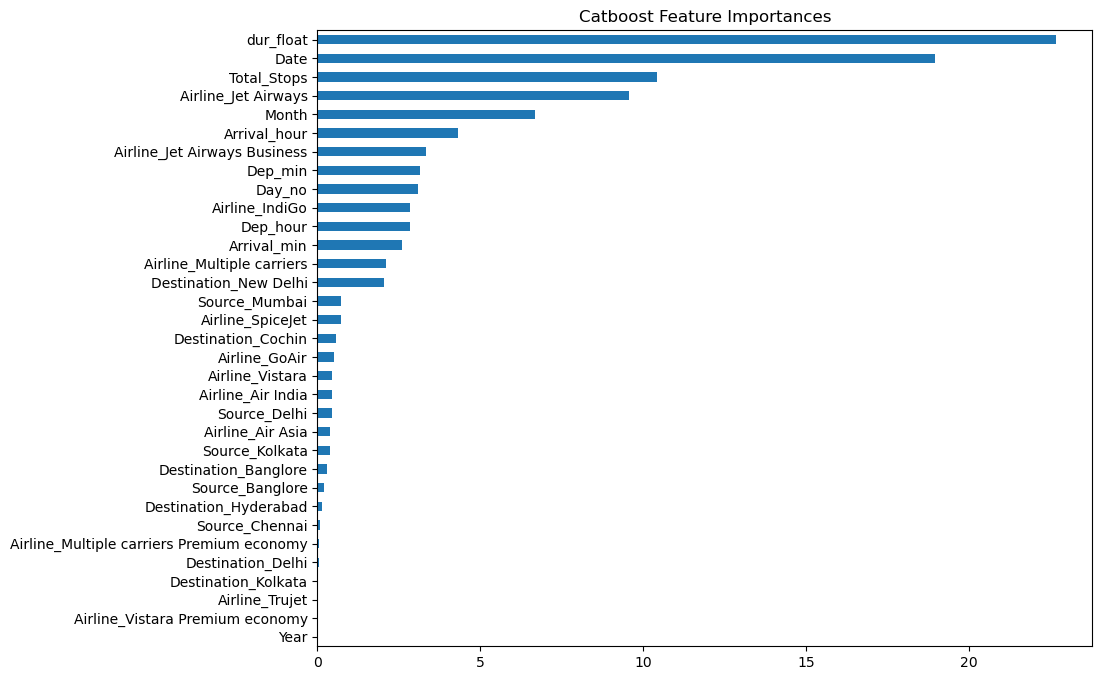

In [56]:
imp.sort_values().plot(kind='barh',figsize=(10,8), title = 'Catboost Feature Importances')

Insights
Top 5 Important features in Flight prices is :

Flight Duration in Hours
Date of the Flight
Total Stops
Airline
Month

# Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [57]:
import pandas as pd
df_play=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [60]:
rows , columns = df_play.shape
print(f'Number of rows in Google Playstore dataset : {rows}')
print(f'Number of columns in Google Playstore dataset : {columns}')

Number of rows in Google Playstore dataset : 10841
Number of columns in Google Playstore dataset : 13


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.


In [61]:
df_play[df_play.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [62]:
df_play = df_play.drop(index=10472,axis=0)

In [71]:
df_play.groupby(by='Category').describe()

Rating                                                 
                      count      mean       std  min    25%  50%    75%  max
Category                                                                    
ART_AND_DESIGN         62.0  4.358065  0.358297  3.2  4.100  4.4  4.700  5.0
AUTO_AND_VEHICLES      73.0  4.190411  0.543692  2.1  4.000  4.3  4.600  4.9
BEAUTY                 42.0  4.278571  0.362603  3.1  4.000  4.3  4.575  4.9
BOOKS_AND_REFERENCE   178.0  4.346067  0.429046  2.7  4.100  4.5  4.600  5.0
BUSINESS              303.0  4.121452  0.624422  1.0  3.900  4.3  4.500  5.0
COMICS                 58.0  4.155172  0.537758  2.8  3.825  4.4  4.500  5.0
COMMUNICATION         328.0  4.158537  0.426192  1.0  4.000  4.3  4.400  5.0
DATING                195.0  3.970769  0.630510  1.0  3.700  4.1  4.400  5.0
EDUCATION             155.0  4.389032  0.251894  3.5  4.200  4.4  4.600  4.9
ENTERTAINMENT         149.0  4.126174  0.302556  3.0  3.900  4.2  4.300  4.7
EVENTS                 45.0  4.435556  0.419499  2.9  4.200  4.5  4.700  5.0
FAMILY               1747.0  4.192272  0.508026  1.0  4.000  4.3  4.500  5.0
FINANCE               323.0  4.131889  0.642108  1.0  4.000  4.3  4.500  5.0
FOOD_AND_DRINK        109.0  4.166972  0.548070  1.7  4.000  4.3  4.500  5.0
GAME                 1097.0  4.286326  0.365375  1.0  4.100  4.4  4.500  5.0
HEALTH_AND_FITNESS    297.0  4.277104  0.617822  1.4  4.100  4.5  4.600  5.0
HOUSE_AND_HOME         76.0  4.197368  0.368411  2.8  4.000  4.3  4.500  4.8
LIBRARIES_AND_DEMO     65.0  4.178462  0.378522  3.1  4.000  4.2  4.400  5.0
LIFESTYLE             314.0  4.094904  0.693907  1.5  3.800  4.2  4.600  5.0
MAPS_AND_NAVIGATION   124.0  4.051613  0.519926  1.9  3.775  4.2  4.400  4.9
MEDICAL               350.0  4.189143  0.663581  1.0  4.000  4.3  4.600  5.0
NEWS_AND_MAGAZINES    233.0  4.132189  0.536707  1.7  3.900  4.2  4.500  5.0
PARENTING              50.0  4.300000  0.517845  2.0  4.100  4.4  4.675  5.0
PERSONALIZATION       314.0  4.335987  0.352732  2.5  4.200  4.4  4.600  5.0
PHOTOGRAPHY           317.0  4.192114  0.462896  2.0  4.000  4.3  4.500  5.0
PRODUCTIVITY          351.0  4.211396  0.504931  1.0  4.100  4.3  4.500  5.0
SHOPPING              238.0  4.259664  0.404577  1.6  4.100  4.3  4.500  5.0
SOCIAL                259.0  4.255598  0.413809  1.9  4.100  4.3  4.500  5.0
SPORTS                319.0  4.223511  0.427857  1.5  4.100  4.3  4.500  5.0
TOOLS                 734.0  4.047411  0.616143  1.0  3.800  4.2  4.400  5.0
TRAVEL_AND_LOCAL      226.0  4.109292  0.504691  2.2  3.900  4.3  4.400  5.0
VIDEO_PLAYERS         160.0  4.063750  0.551098  1.8  3.800  4.2  4.400  4.9
WEATHER                75.0  4.244000  0.331353  3.3  4.050  4.3  4.500  4.8

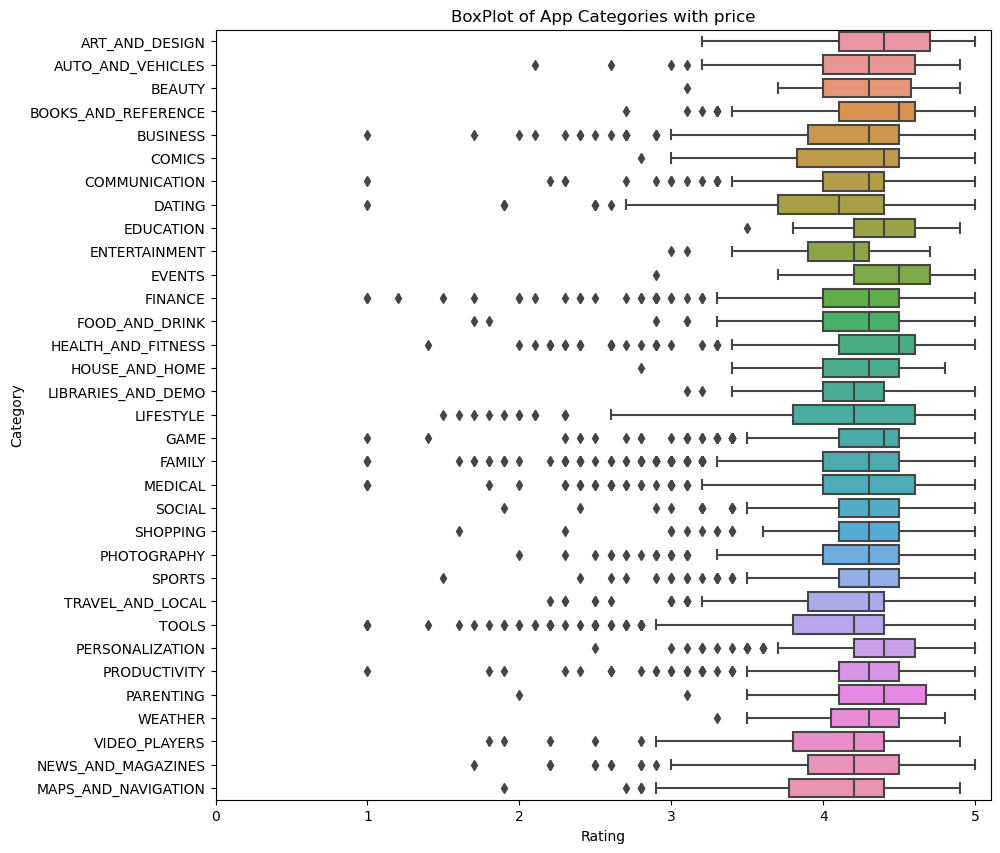

In [63]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=df_play,x='Rating',y='Category')
plt.xlim([0,5.1])
plt.title('BoxPlot of App Categories with price')
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.


In [64]:
df_play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Insights :
1474 missing values found in Rating
1 Missing Value found in Type
8 Missing Values found in Current Ver
2 Missing Values found in Android Ver

If there are missing values in the dataset, it can affect the accuracy of descriptive statistics, correlations, and predictive models. For example, missing values in the rating column of the Google Playstore dataset may cause the mean rating to be skewed. In addition, if missing values are not handled correctly, it can result in errors during data analysis, such as dropped observations, biased estimates, or distorted results.
Therefore, it is essential to identify missing values in a dataset and develop a strategy for handling them. Some common strategies for handling missing values include removing the rows with missing values, imputing missing values with the mean or median of the column, or using machine learning algorithms that can handle missing values. The choice of strategy depends on the nature and extent of the missing data and the specific research question.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.


In [65]:
#Handling the Size Variable in dataset
df_play['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [66]:
df_play[df_play.Size=='Varies with device']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


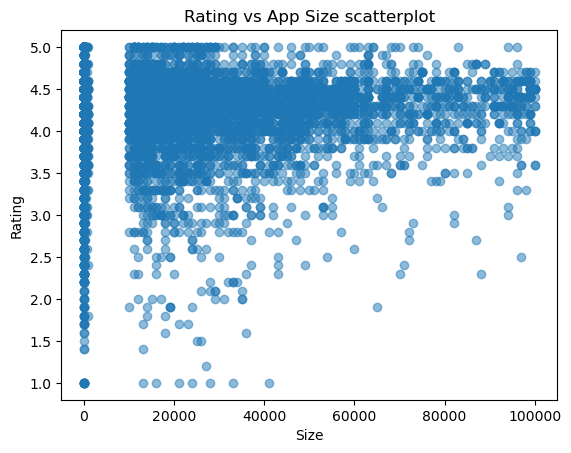

In [67]:
# Convert all units into k
import numpy as np
df_play['Size'] = df_play['Size'].str.replace('M','000')
df_play['Size'] = df_play['Size'].str.replace('k','')
df_play['Size'] = df_play['Size'].replace('Varies with device',np.nan)
df_play['Size'] = df_play['Size'].replace('1,000+','1')
df_play['Size'] = df_play['Size'].astype(float)
import matplotlib.pyplot as plt
plt.scatter(x=df_play['Size'],y=df_play['Rating'], alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Rating vs App Size scatterplot')
plt.show()

In [68]:
df_play.corr()

,Rating,Size
Rating,1.000000,0.082134
Size,0.082134,1.000000


Insights :
There is no relation between ratings and size as correlation is 0 and scatter plot also shows the same

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


In [69]:
df_play.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [70]:
# Cleaning Price Column
chars_to_remove = ['+',',','$']
columns_to_clean = ['Installs','Price']
for items in chars_to_remove:
    for col in columns_to_clean:
        df_play[col] = df_play[col].str.replace(items,'')      
df_play['Price'] = df_play['Price'].astype(float)
df_play.groupby(by='Type').mean()['Price']

Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

<AxesSubplot:title={'center':'Barchart of app Type vs Average Price'}, xlabel='Type'>

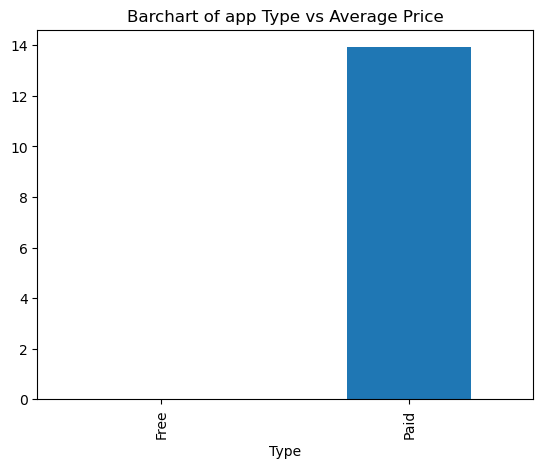

In [71]:
df_play.groupby(by='Type').mean()['Price'].plot(kind='bar',title='Barchart of app Type vs Average Price')


Insights
Free apps have 0 average price
Paid apps have 13.92 average price

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.


In [72]:
df_play['App'].duplicated().sum()

1181

In [73]:
df_play = df_play.drop_duplicates(subset = ['App'],keep='first')
df_play['Installs']=df_play['Installs'].astype(int)
mx = df_play['Installs'].max()
mx

1000000000

In [74]:
top_10_apps = df_play.sort_values(by=['Installs','Rating'],ascending=False).head(10)[['App','Installs','Rating']]
top_10_apps

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
336,WhatsApp Messenger,1000000000,4.4
3234,Google,1000000000,4.4
3454,Google Drive,1000000000,4.4
338,Google Chrome: Fast & Secure,1000000000,4.3
340,Gmail,1000000000,4.3
865,Google Play Games,1000000000,4.3
3117,Maps - Navigate & Explore,1000000000,4.3


In [75]:
list(top_10_apps['App'])

['Subway Surfers',
 'Instagram',
 'Google Photos',
 'WhatsApp Messenger',
 'Google',
 'Google Drive',
 'Google Chrome: Fast & Secure',
 'Gmail',
 'Google Play Games',
 'Maps - Navigate & Explore']

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

In [76]:
df_play['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot:title={'center':'Value Count of App Categories'}>

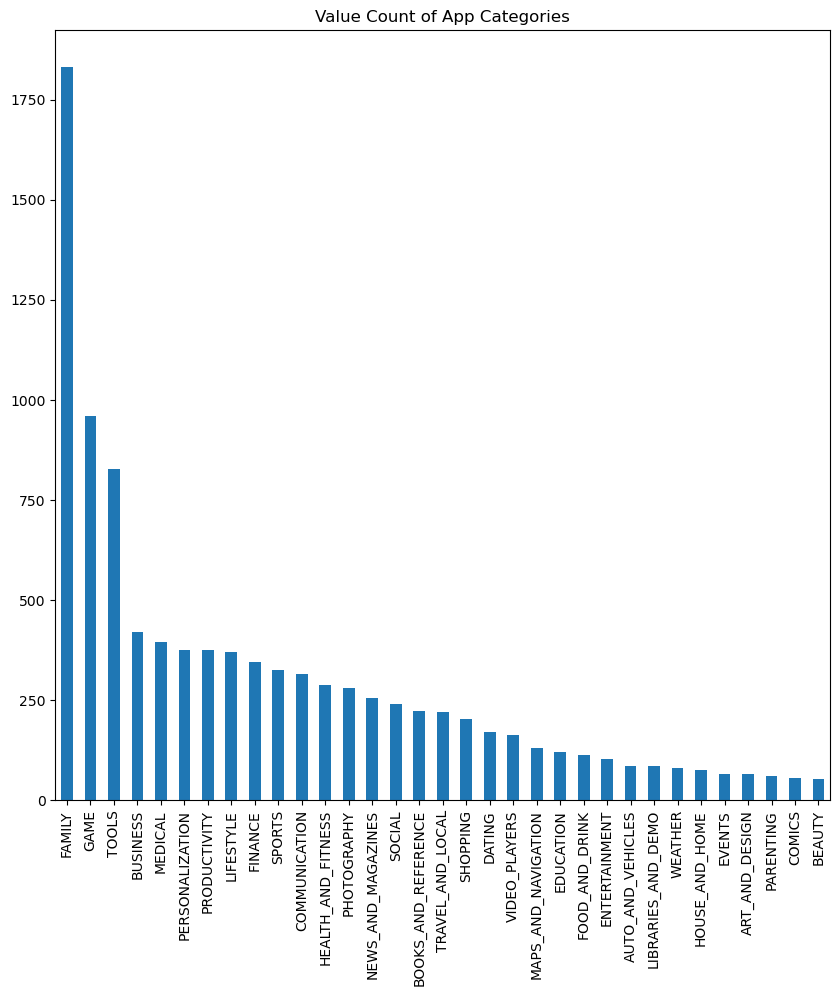

In [77]:
df_play['Category'].value_counts().plot(kind='bar',figsize=(10,10),title='Value Count of App Categories')


In [78]:
df_play.groupby(by='Category').mean()['Rating'].sort_values(ascending=False)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
HEALTH_AND_FITNESS     4.243033
SHOPPING               4.230000
SPORTS                 4.216154
AUTO_AND_VEHICLES      4.190411
PRODUCTIVITY           4.183389
COMICS                 4.181481
FAMILY                 4.179664
LIBRARIES_AND_DEMO     4.178125
FOOD_AND_DRINK         4.172340
MEDICAL                4.166552
PHOTOGRAPHY            4.157414
HOUSE_AND_HOME         4.150000
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.121569
COMMUNICATION          4.121484
FINANCE                4.115563
BUSINESS               4.098479
LIFESTYLE              4.093355
TRAVEL_AND_LOCAL       4.069519
VIDEO_PLAYERS          4.044595
TOOLS                  4.039554

In [79]:
df_play.groupby(by='Category').mean()['Rating'].sort_values(ascending=False)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
HEALTH_AND_FITNESS     4.243033
SHOPPING               4.230000
SPORTS                 4.216154
AUTO_AND_VEHICLES      4.190411
PRODUCTIVITY           4.183389
COMICS                 4.181481
FAMILY                 4.179664
LIBRARIES_AND_DEMO     4.178125
FOOD_AND_DRINK         4.172340
MEDICAL                4.166552
PHOTOGRAPHY            4.157414
HOUSE_AND_HOME         4.150000
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.121569
COMMUNICATION          4.121484
FINANCE                4.115563
BUSINESS               4.098479
LIFESTYLE              4.093355
TRAVEL_AND_LOCAL       4.069519
VIDEO_PLAYERS          4.044595
TOOLS                  4.039554

In [80]:
df_play.groupby(by='Category').sum()['Installs'].sort_values(ascending=False)

Category
GAME                   1.387892e+10
COMMUNICATION          1.103828e+10
TOOLS                  8.001772e+09
PRODUCTIVITY           5.793091e+09
SOCIAL                 5.487868e+09
PHOTOGRAPHY            4.649148e+09
FAMILY                 4.427942e+09
VIDEO_PLAYERS          3.926903e+09
TRAVEL_AND_LOCAL       2.894887e+09
NEWS_AND_MAGAZINES     2.369218e+09
ENTERTAINMENT          2.113660e+09
BOOKS_AND_REFERENCE    1.665970e+09
PERSONALIZATION        1.532495e+09
SHOPPING               1.400349e+09
HEALTH_AND_FITNESS     1.144023e+09
SPORTS                 1.096474e+09
BUSINESS               6.971649e+08
LIFESTYLE              5.038235e+08
MAPS_AND_NAVIGATION    5.032819e+08
FINANCE                4.553487e+08
WEATHER                3.611005e+08
EDUCATION              3.529520e+08
FOOD_AND_DRINK         2.117988e+08
DATING                 1.409261e+08
ART_AND_DESIGN         1.143381e+08
HOUSE_AND_HOME         9.721246e+07
AUTO_AND_VEHICLES      5.313021e+07
LIBRARIES_AND_DEMO 

<AxesSubplot:title={'center':'Average Review per category'}, xlabel='Category'>

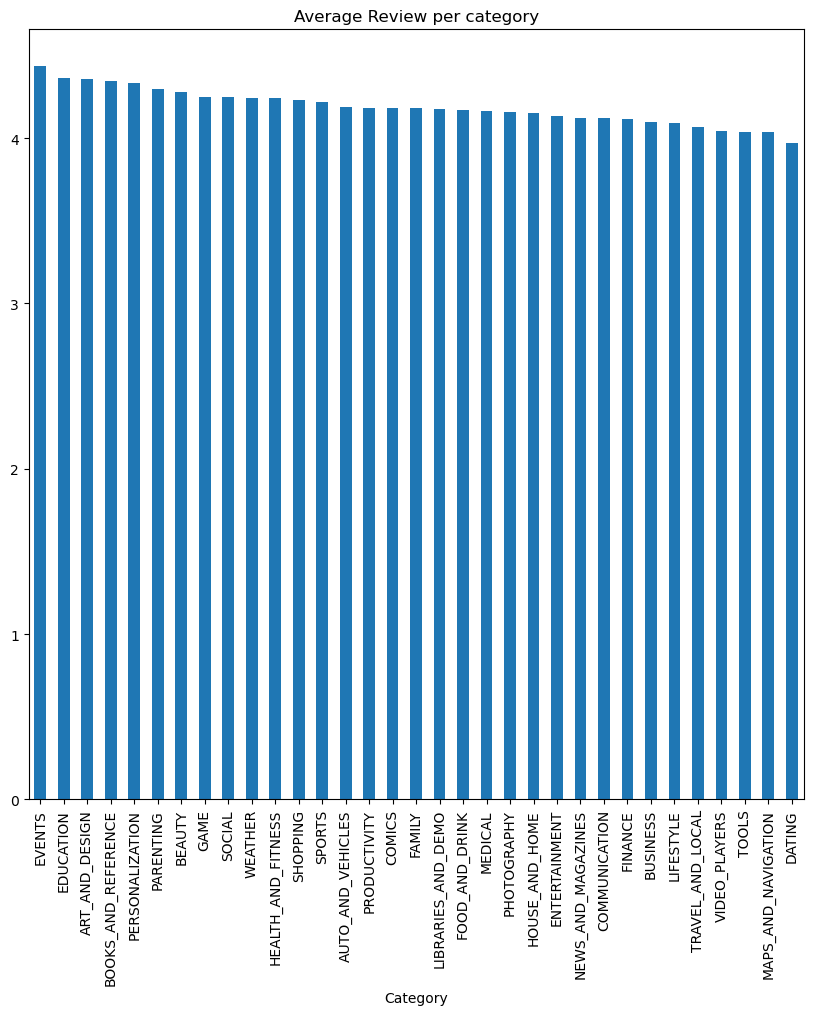

In [81]:

df_play.groupby(by='Category').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',
                                                                                  figsize=(10,10),
                                                                                  title = 'Average Review per category')

In [82]:
df_play.groupby(by='Category').sum()['Installs'].sort_values(ascending=False)

Category
GAME                   1.387892e+10
COMMUNICATION          1.103828e+10
TOOLS                  8.001772e+09
PRODUCTIVITY           5.793091e+09
SOCIAL                 5.487868e+09
PHOTOGRAPHY            4.649148e+09
FAMILY                 4.427942e+09
VIDEO_PLAYERS          3.926903e+09
TRAVEL_AND_LOCAL       2.894887e+09
NEWS_AND_MAGAZINES     2.369218e+09
ENTERTAINMENT          2.113660e+09
BOOKS_AND_REFERENCE    1.665970e+09
PERSONALIZATION        1.532495e+09
SHOPPING               1.400349e+09
HEALTH_AND_FITNESS     1.144023e+09
SPORTS                 1.096474e+09
BUSINESS               6.971649e+08
LIFESTYLE              5.038235e+08
MAPS_AND_NAVIGATION    5.032819e+08
FINANCE                4.553487e+08
WEATHER                3.611005e+08
EDUCATION              3.529520e+08
FOOD_AND_DRINK         2.117988e+08
DATING                 1.409261e+08
ART_AND_DESIGN         1.143381e+08
HOUSE_AND_HOME         9.721246e+07
AUTO_AND_VEHICLES      5.313021e+07
LIBRARIES_AND_DEMO 

<AxesSubplot:title={'center':'Total Installs per category'}, xlabel='Category'>

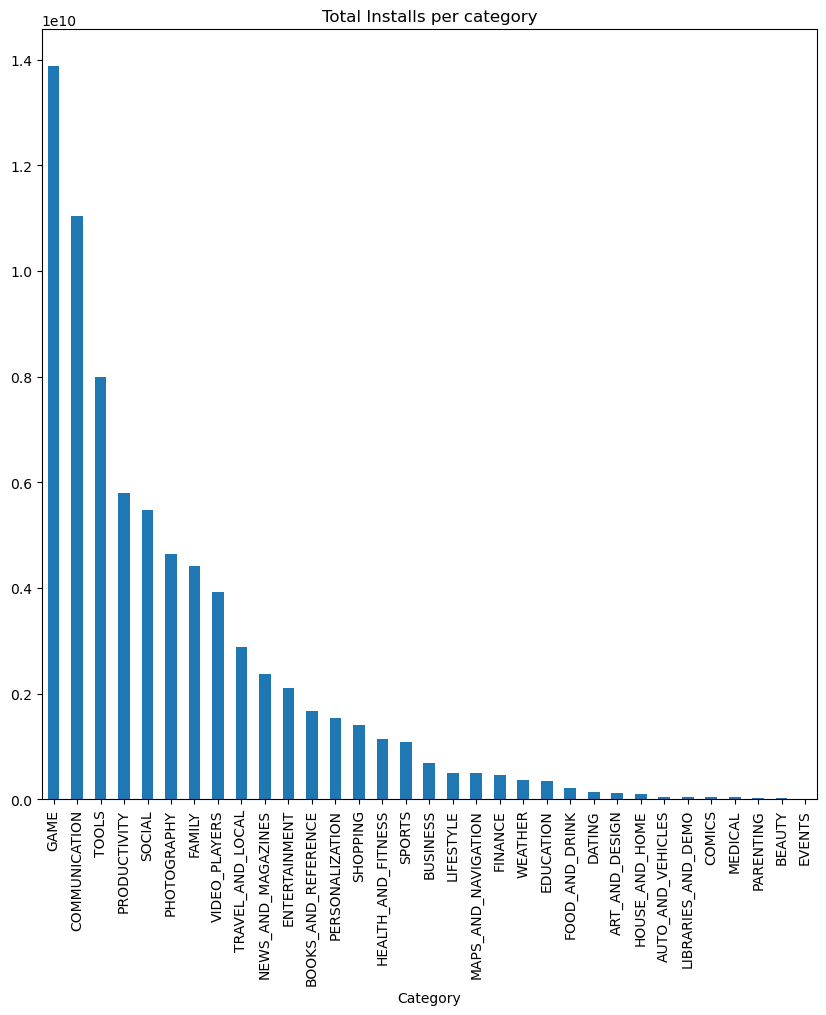

In [83]:
df_play.groupby(by='Category').sum()['Installs'].sort_values(ascending=False).plot(kind='bar',
                                                                                   figsize=(10,10),
                                                                                   title='Total Installs per category')

Insight regarding app categories:
Top 3 app Categories with highest value count are : Family, Game, Tools
Top 3 app Categories with highest average rating are : Game, Communication and Tools
Top 3 app Categories with highest installs are : Game, Communication and Tools

Q.16 A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Play Store, we would need to analyze various features such as:
Number of downloads: This would indicate how popular an app is among users.

Rating: A higher rating indicates that users are satisfied with the app.

Reviews: The number of reviews and the sentiment of those reviews could provide insights into user satisfaction and potential areas for improvement.

Category: Analyzing the categories in which the apps are listed could help identify the most successful app developers in a specific category.

Price: The price of the app could provide insights into the developer's pricing strategy.

App size: The size of the app could impact its popularity and the user experience.

To present the findings, we could use various data visualizations such as:
Bar charts and pie charts to represent the number of downloads and rating of the apps.

Scatter plots and bubble charts to analyze the correlation between the number of downloads, rating, and price.

Heat maps to analyze the distribution of apps across different categories.

Line graphs to represent the trend in the number of reviews over time.

Tables and charts to compare the performance of different app developers.

Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, price, and rating.

Overall, the combination of these features and visualizations could provide valuable insights to the mobile app development company and help them make data-driven decisions about which app developers to work with.

In [84]:
df_play.sort_values(by=['Installs','Rating'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,NaN,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3454,Google Drive,PRODUCTIVITY,4.4,2731171,NaN,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,NaN,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device


In [85]:
df_play.corr()

,Rating,Size,Installs,Price
Rating,1.000000,0.061223,0.040143,-0.021199
Size,0.061223,1.000000,0.133988,-0.022141
Installs,0.040143,0.133988,1.000000,-0.009405
Price,-0.021199,-0.022141,-0.009405,1.000000


In [86]:
df_play.groupby(by=['Category','Installs']).mean()['Rating']

Category        Installs
ART_AND_DESIGN  0                NaN
                100         5.000000
                1000        4.366667
                5000        4.375000
                10000       4.445455
                              ...   
WEATHER         500000      4.428571
                1000000     4.233333
                5000000     4.100000
                10000000    4.340000
                50000000    4.425000
Name: Rating, Length: 512, dtype: float64

In [87]:
df_play.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10]

Genres
Comics;Creativity              4.800000
Board;Pretend Play             4.800000
Health & Fitness;Education     4.700000
Adventure;Brain Games          4.600000
Puzzle;Education               4.600000
Strategy;Action & Adventure    4.600000
Entertainment;Creativity       4.533333
Music;Music & Video            4.533333
Racing;Pretend Play            4.500000
Tools;Education                4.500000
Name: Rating, dtype: float64

<AxesSubplot:title={'center':'Genres vs Average Rating'}, xlabel='Genres'>

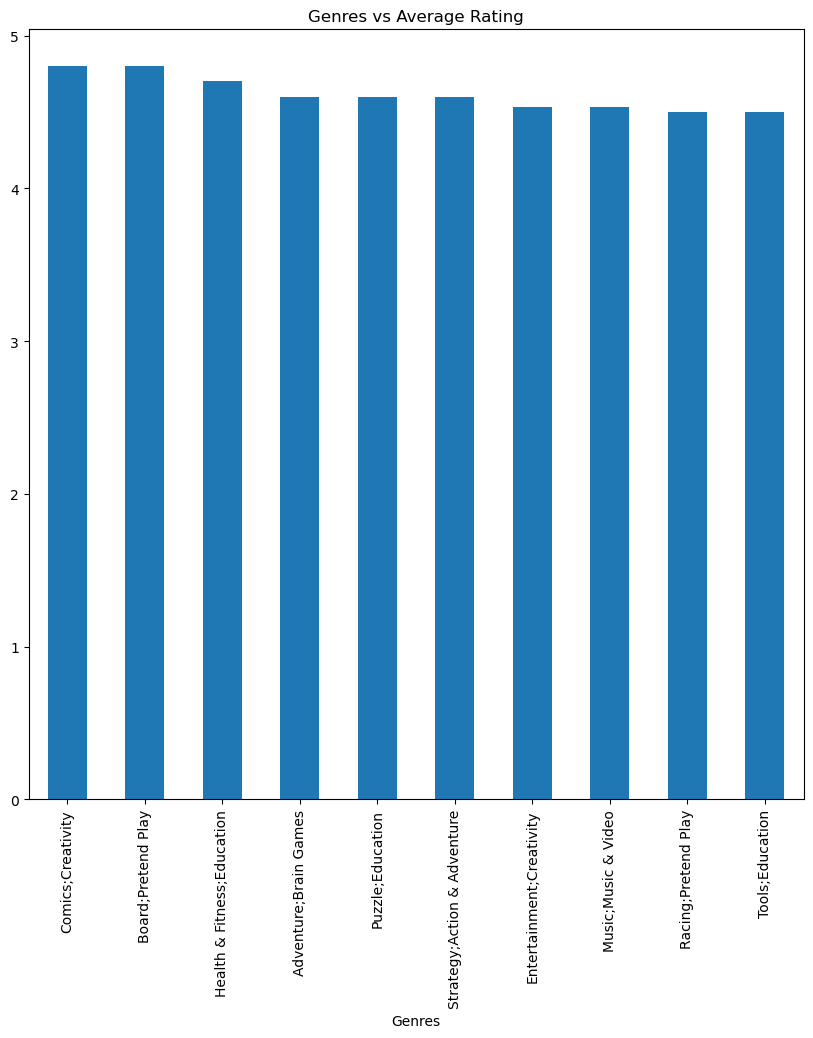

In [88]:

df_play.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',
                                                                                      figsize=(10,10),
                                                                                      title='Genres vs Average Rating')

In [89]:
df_play.groupby(by='Type').mean()['Rating']

Type
Free    4.166372
Paid    4.259603
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Type'>

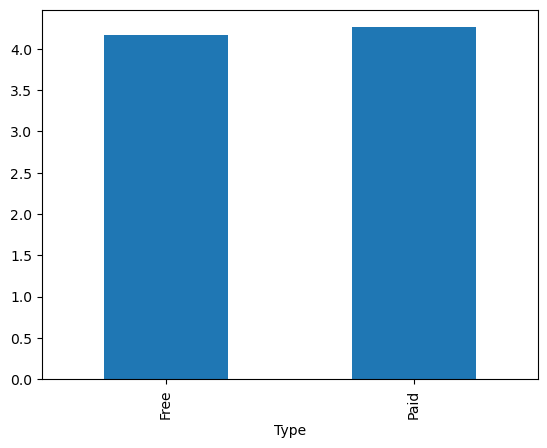

In [90]:
df_play.groupby(by='Type').mean()['Rating'].plot(kind='bar')

In [91]:
df_play.groupby(by='Type').sum()['Installs']

Type
Free    7.506557e+10
Paid    5.736488e+07
Name: Installs, dtype: float64

Insights :
Top 3 apps with highest Installs and Ratings are : Subway Surfers, Instagram and Google Photos
Top 3 Genres with highest Average Rating are : Comics , Board, Health and fitness
Paid apps have slightly better average Rating
Free apps are installed a lot when compared to Paid apps.

Q.17 A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?


To identify the best time to launch a new app, we would need to analyze various features such as:
Seasonality: Certain categories of apps may perform better during specific seasons (e.g., fitness apps during the new year or travel apps during the summer).

Monthly trends: Analyzing the number of downloads, rating, and reviews over time could help identify trends in user behavior and preferences.

Day of the week: The day of the week may impact app usage and downloads. For example, weekdays may see higher usage for productivity apps, while weekends may see higher usage for gaming apps.

Competition: Analyzing the number of apps in a particular category and their performance could provide insights into the level of competition in the market.

User demographics: Understanding the demographics of the app's target audience could help identify the best time to launch the app based on their behavior and preferences.

To present the findings, we could use various data visualizations such as:
Line graphs to represent the trend in the number of downloads, rating, and reviews over time.

Heat maps to analyze the distribution of app downloads by month and day of the week.

Bar charts to represent the performance of competing apps in a particular category.

Scatter plots to analyze the correlation between the number of downloads, rating, and reviews and the time of the year.

Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, user demographics, and time of the year.

Overall, the combination of these features and visualizations could provide valuable insights to the marketing research firm and help them make data-driven decisions about when to launch a new app.

In [93]:
df_play['Last Updated']= pd.to_datetime(df_play['Last Updated'])
df_play['day'] = df_play['Last Updated'].dt.day
df_play['month'] = df_play['Last Updated'].dt.month
df_play['year'] = df_play['Last Updated'].dt.year
df_play['day_name'] = df_play['Last Updated'].dt.day_name()
df_play.groupby(by='month').mean()['Rating']

month
1     4.139637
2     4.093596
3     4.105143
4     4.142048
5     4.145722
6     4.166932
7     4.233886
8     4.275320
9     4.040400
10    4.014658
11    4.114085
12    4.061585
Name: Rating, dtype: float64

<AxesSubplot:xlabel='month'>

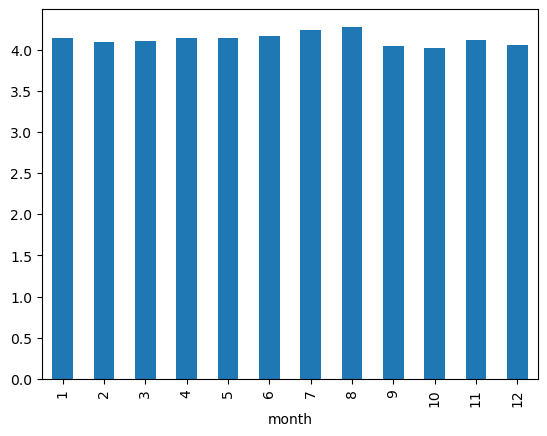

In [95]:
df_play.groupby(by='month').mean()['Rating'].plot(kind='bar')

In [96]:
df_play.groupby(by='month').sum()['Installs'].sort_values(ascending=False)

month
8     3.103106e+10
7     2.864520e+10
6     4.854350e+09
5     3.646908e+09
4     1.455525e+09
12    1.037049e+09
1     1.031288e+09
11    8.951333e+08
3     8.940678e+08
2     7.693515e+08
10    4.480420e+08
9     4.149623e+08
Name: Installs, dtype: float64

<AxesSubplot:xlabel='month'>

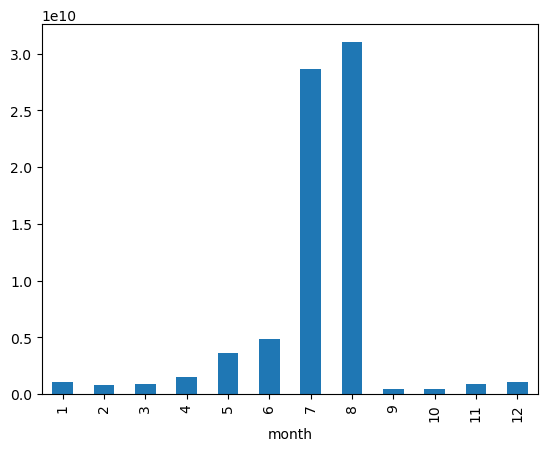

In [97]:
df_play.groupby(by='month').sum()['Installs'].plot(kind='bar')

In [98]:
df_play.groupby(by='day_name').mean()['Rating']

day_name
Friday       4.193084
Monday       4.140881
Saturday     4.200332
Sunday       4.257000
Thursday     4.173919
Tuesday      4.167173
Wednesday    4.149077
Name: Rating, dtype: float64

<AxesSubplot:xlabel='day_name'>

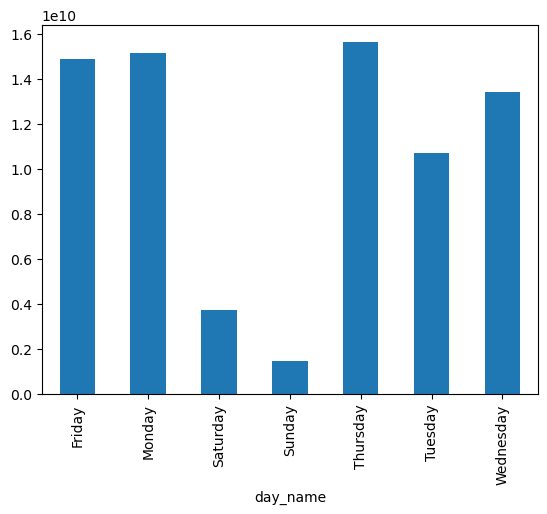

In [103]:
df_play.groupby(by='day_name').sum()['Installs'].plot(kind='bar')

In [104]:
df_play.groupby(by=['year']).sum()['Installs']

year
2010    1.000000e+05
2011    1.740710e+07
2012    1.399221e+07
2013    1.030864e+08
2014    2.697852e+08
2015    4.053395e+08
2016    1.292366e+09
2017    2.893101e+09
2018    7.012776e+10
Name: Installs, dtype: float64

Insights :
Average Reviews are almost same regardless of month or day of week.
Most Apps are installed in month of August
Most Apps are installed in day of week : Thursday
App installs are increasing rapidly with each year